In [1]:
import psycopg2 as pg
import pandas as pd

In [2]:
def connectionDataBase():
    connection = pg.connect(user="postgres", password="2023@Tag", host="159.65.42.225", port=5432, database="comercial_BI")
    return connection

testes

In [3]:
conn = connectionDataBase()

cursor = conn.cursor()

query = '''SELECT distinct tt.cnpj_ as cnpj,tt.nome_fantasia,tt.idade,tt.cna_name,tt.razao_social,tt.porte,tt.capital_social,tt.cod_nat_juri_,tt.qual_respons_,tt.uf,tt.data_situacao_cadastral,tt.data_incio_atividade,tt.telefone, tt.muni_name,tt.logradouro ,tt.tipo_logradouro ,tt.complemento,tt.bairro ,tt.cep,tt.cep_lat,tt.cep_long
                        FROM (
                        SELECT cc.cnpj_,cc.cnpj,cna.cna_name,cc.nome_fantasia,cc.idade,ee.razao_social,ee.porte,ee.capital_social,ee.cod_nat_juri_,ee.qual_respons_,cc.uf,cc.data_situacao_cadastral,cc.data_incio_atividade,cc.telefone, mm.muni_name,cc.logradouro ,cc.tipo_logradouro ,cc.complemento,cc.bairro ,cc.cep,cp.cep_lat,cp.cep_long from cnp_cnpj cc
                        left join mun_municipio mm on mm.muni_cod = cc.muncipio
                        left join em_empresas ee on ee.cnpj = cc.cnpj
                        left join cep_lat_long cp on cp.cep=cc.cep
                        left join cnae_cnaes_ cna on cna.cna_subclass = cc.cnae_principal
                        WHERE cc.cnae_principal IN ('6920601', '8630504', '8650004') AND cc.uf IN ('TO', 'MA', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'MG', 'BA', 'ES', 'RJ', 'SP')) AS tt'''
query=cursor.execute(query)
query=cursor.fetchall()

nomes_colunas = [desc[0] for desc in cursor.description]
df = pd.DataFrame(query,columns=nomes_colunas)
df

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,data_incio_atividade,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long
0,00000103/0002-32,Não Informado,3 anos,Atividades de contabilidade,CTB REMA ASSESSORIA CONTABIL LTDA,Micro Empresa,10000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,2021-11-10,11993956886,CAJAMAR,SANTA HELENA,RUA,BOX 7,PONUNDUVA,07768390,NaN,NaN
1,00000263/0001-09,Não Informado,30 anos,Atividades de contabilidade,WINTEC SERVICOS CONTABEIS S/C LTDA,Micro Empresa,0.0,Sociedade Simples Limitada,Sócio-Administrador,SP,...,1994-08-05,1137442559,SAO PAULO,ITARARE,RUA,CJ77/ SALA B,CERQ CESAR,01308030,-23.559520,-46.623434
2,00000325/0001-74,Não Informado,30 anos,Atividades de contabilidade,TERGEC CONTABILIDADE GERENCIAL - SOCIEDADE EMP...,Micro Empresa,10000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,1994-08-17,1147809875,SAO PAULO,BENTO FREITAS,RUA,CONJ 95,VILA BUARQUE,01220000,-23.548000,-46.628244
3,00000338/0001-43,Não Informado,30 anos,Atividades de contabilidade,MULTICONSULT CONTABIL LTDA,Micro Empresa,0.0,Sociedade Simples Limitada,Sócio-Administrador,SP,...,1994-08-23,00000000,SAO PAULO,JOAQUIM ANTUNES,RUA,Não Informado,PINHEIROS,05415011,-23.548000,-47.075532
4,00000476/0001-22,CONTBRAS CONTABILIDADE,30 anos,Atividades de contabilidade,CONTBRAS ASSESSORIA E SERVICOS CONTABEIS S/C LTDA,Micro Empresa,0.0,Sociedade Simples Limitada,Sócio-Administrador,SP,...,1994-10-17,00000000,SAO PAULO,GONCALO SOARES FRANCA,RUA,SALA 04,VILA SAO JOSE,04836030,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154700,97553627/0001-01,Não Informado,13 anos,Atividades de fisioterapia,None,None,None,None,None,CE,...,2011-06-29,8836282182,SANTA QUITERIA,DR. OTAVIO LOBO,RUA,Não Informado,CENTRO,62280000,NaN,NaN
154701,97553811/0001-51,Não Informado,13 anos,Atividade odontológica,None,None,None,None,None,MG,...,2011-07-14,3232414520,JUIZ DE FORA,BARAO DO RIO BRANCO,AVENIDA,SALA: 1604;,CENTRO,36010011,-21.762424,-43.343400
154702,97553899/0001-01,MARIANA CANDICE CLINICA ESPECIALIZADA,13 anos,Atividade odontológica,None,None,None,None,None,BA,...,2011-06-06,75981898009,VALENTE,DA CONCEICAO,RUA,CASA,CENTRO,48890000,-11.410583,-39.465347
154703,97553991/0001-71,AMO ASSISTECIA MEDICA ODONTOLOGICA,13 anos,Atividade odontológica,None,None,None,None,None,RN,...,2011-07-12,8441412986,NATAL,ANTONIO BASILIO,AVENIDA,EDIF LAGOA CENTER SALA 501,LAGOA NOVA,59056015,NaN,NaN


In [4]:
size = [
        "Micro Empresa",
        "Empresa de Pequeno Porte",
        "Demais"
]

In [5]:
cod_nat =[
        "Fundo público da administração direta federal",
        "Fundo público da administração indireta municipal",
        "Sociedade empresária limitada",
        "Empresa individual imobiliária",
        "Empresa pública",
        "Cooperativa",
        "Consórcio de empregadores",
        "Autarquia municipal",
        "Empresa binacional",
        "Fundação pública de direito privado federal",
        "Fundação pública de direito público federal",
        "Sociedade empresária em comandita simples",
        "Órgão público do poder executivo estadual ou do distrito federal",
        "Fundação pública de direito privado estadual ou do distrito federal",
        "Candidato a cargo político eletivo",
        "Empresa domiciliada no exterior",
        "Órgão público do poder legislativo municipal",
        "Organização social (os)",
        "Comunidade indígena",
        "Sociedade simples em comandita simples",
        "Produtor rural (pessoa física)",
        "Sociedade de economia mista",
        "Órgão público do poder legislativo federal",
        "Sociedade simples pura",
        "Órgão público autônomo estadual ou do distrito federal",
        "Sociedade empresária em nome coletivo",
        "Fundo público da administração direta municipal",
        "Fundo privado",
        "Comitê financeiro de partido político",
        "Órgão de direção nacional de partido político",
        "Sociedade anônima aberta",
        "Natureza jurídica não informada",
        "Sociedade simples limitada",
        "Fundação pública de direito público estadual ou do distrito federal",
        "Órgão público do poder legislativo estadual ou do distrito federal",
        "Comissão polinacional",
        "Frente plebiscitária ou referendária",
        "Autarquia estadual ou do distrito federal",
        "Órgão público do poder executivo federal",
        "Órgão público autônomo federal",
        "Órgão público do poder executivo municipal",
        "Consórcio público de direito privado",
        "Cooperativas de consumo",
        "Organização internacional",
        "Autarquia federal",
        "Fundação ou associação domiciliada no exterior",
        "Serviço notarial e registral (cartório)",
        "Município",
        "Sociedade empresária em comandita por ações",
        "Órgão de direção local de partido político",
        "Empresa individual de responsabilidade limitada (de natureza simples)",
        "Consórcio de sociedades",
        "Consórcio público de direito público (associação pública)",
        "Grupo de sociedades",
        "Estabelecimento, no brasil, de sociedade estrangeira",
        "Sociedade mercantil de capital e indústria",
        "Fundação pública de direito público municipal",
        "Estabelecimento, no brasil, de fundação ou associação estrangeiras",
        "Entidade de mediação e arbitragem",
        "Associação privada"
    ]

In [20]:
cod_nat = [x.lower() for x in cod_nat]

In [21]:
cod_nat[:3]

['fundo público da administração direta federal',
 'fundo público da administração indireta municipal',
 'sociedade empresária limitada']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154705 entries, 0 to 154704
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cnpj                     154705 non-null  object 
 1   nome_fantasia            154705 non-null  object 
 2   idade                    154705 non-null  object 
 3   cna_name                 154705 non-null  object 
 4   razao_social             120875 non-null  object 
 5   porte                    120875 non-null  object 
 6   capital_social           120875 non-null  object 
 7   cod_nat_juri_            120875 non-null  object 
 8   qual_respons_            120860 non-null  object 
 9   uf                       154705 non-null  object 
 10  data_situacao_cadastral  154705 non-null  object 
 11  data_incio_atividade     154705 non-null  object 
 12  telefone                 154705 non-null  object 
 13  muni_name                154705 non-null  object 
 14  logr

In [22]:
cod_nat[:2]

['fundo público da administração direta federal',
 'fundo público da administração indireta municipal']

In [23]:
df['data_situacao_cadastral']=pd.to_datetime(df['data_situacao_cadastral'].astype(str),format='%Y-%m-%d')
df['data_situacao_cadastral']=df['data_situacao_cadastral'].astype(str)
df['data_incio_atividade']=pd.to_datetime(df['data_incio_atividade'].astype(str),format='%Y-%m-%d')
df=df.sort_values(by='data_incio_atividade')
df_dates = df[(df['data_incio_atividade']>=f'2010-2-1') & (df['data_incio_atividade']<f'2024-2-1')]

df_size__ = df_dates[df_dates['porte'].isin(size)]

df_size__['cod_nat_juri_'] = df_size__['cod_nat_juri_'].str.lower()

df_size_ =df_size__[df_size__['cod_nat_juri_'].isin(cod_nat)]

# df_size_['st_muni']=df_size_['muni_name'] +' - ' + df_size_['uf']

# df_size = df_size_

C:\Users\saulo\AppData\Local\Temp\ipykernel_24536\4197894307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size__['cod_nat_juri_'] = df_size__['cod_nat_juri_'].str.lower()


In [27]:
for ele in df_size__['cod_nat_juri_'].unique().tolist():
    if ele in cod_nat:
        print('tem')
    else:
        print('nao')

nao
tem
tem
tem
nao
nao
tem
tem
tem
nao
tem
nao
nao
nao
tem
nao
tem


In [31]:
df_size__['cod_nat_juri_'].unique().tolist()[5]

'empresa individual de responsabilidade limitada (de natureza empresária)'

In [29]:
cod_nat

['fundo público da administração direta federal',
 'fundo público da administração indireta municipal',
 'sociedade empresária limitada',
 'empresa individual imobiliária',
 'empresa pública',
 'cooperativa',
 'consórcio de empregadores',
 'autarquia municipal',
 'empresa binacional',
 'fundação pública de direito privado federal',
 'fundação pública de direito público federal',
 'sociedade empresária em comandita simples',
 'órgão público do poder executivo estadual ou do distrito federal',
 'fundação pública de direito privado estadual ou do distrito federal',
 'candidato a cargo político eletivo',
 'empresa domiciliada no exterior',
 'órgão público do poder legislativo municipal',
 'organização social (os)',
 'comunidade indígena',
 'sociedade simples em comandita simples',
 'produtor rural (pessoa física)',
 'sociedade de economia mista',
 'órgão público do poder legislativo federal',
 'sociedade simples pura',
 'órgão público autônomo estadual ou do distrito federal',
 'sociedade 

In [24]:
df_size_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36763 entries, 39227 to 59018
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnpj                     36763 non-null  object        
 1   nome_fantasia            36763 non-null  object        
 2   idade                    36763 non-null  object        
 3   cna_name                 36763 non-null  object        
 4   razao_social             36763 non-null  object        
 5   porte                    36763 non-null  object        
 6   capital_social           36763 non-null  object        
 7   cod_nat_juri_            36763 non-null  object        
 8   qual_respons_            36763 non-null  object        
 9   uf                       36763 non-null  object        
 10  data_situacao_cadastral  36763 non-null  object        
 11  data_incio_atividade     36763 non-null  datetime64[ns]
 12  telefone                 36763 no

In [9]:
df_dates

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,data_incio_atividade,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long
39796,11517195/0001-68,ADCONT CONTABILIDADE,14 anos,Atividades de contabilidade,SONIA T DA CRUZ DIAS - CONTABILIDADE,Micro Empresa,60000.0,Empresário (Individual),Empresário,MG,...,2010-02-01,31998677249,CONGONHAS,DOUTOR MARIO RODRIGUES PEREIRA,PRACA,SALA 07,CENTRO,36410069,NaN,NaN
39227,11428587/0002-31,MAXILO FACIAL,14 anos,Atividade odontológica,MAXILO FACIAL CLINICA DE ODONTOLOGIA LTDA,Demais,88000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,2010-02-01,1150350777,SAO PAULO,AMERICO BRASILIENSE,RUA,CONJ 51,ALTO DA BOA VISTA,04715005,-23.548000,-46.975589
39784,11515741/0001-21,Não Informado,14 anos,Atividades de fisioterapia,GEOVANI TOSO NETO,Micro Empresa,5000.0,Empresário (Individual),Empresário,SP,...,2010-02-01,1639114200,RIBEIRAO PRETO,RUBENS CAVALCANTE,RUA,Não Informado,JOSE SAMPAIO JUNIOR,14065250,NaN,NaN
40133,11581480/0001-48,Não Informado,14 anos,Atividade odontológica,ESPACO ODONTOLOGICO LE MONDE LTDA.,Demais,1000.0,Sociedade Simples Limitada,Sócio-Administrador,RJ,...,2010-02-01,2121133908,RIO DE JANEIRO,DAS AMERICAS,AVENIDA,BLOCO 7 SALA 119,BARRA DA TIJUCA,22640102,NaN,NaN
39935,11543875/0001-56,ROCHA CONTABILIDADE,14 anos,Atividades de contabilidade,CUNHA & ROCHA CONTABILIDADE LTDA,Micro Empresa,25000.0,Sociedade Empresária Limitada,Sócio-Administrador,AL,...,2010-02-01,8232922104,PORTO CALVO,PROFESSOR GUEDES DE MIRANDA,RUA,Não Informado,CENTRO,57900000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150350,53139696/0001-06,'CLINICA BEATRIZ DIAS LTDA',1 anos,Atividade odontológica,None,None,None,None,None,SP,...,2023-12-08,11988067111,SAO PAULO,VERGUEIRO,RUA,SALA 410 - TORRE SUL,VILA MARIANA,04101000,-23.312740,-46.636000
150348,53139520/0001-46,Não Informado,1 anos,Atividade odontológica,None,None,None,None,None,SP,...,2023-12-08,1833614991,PARAGUACU PAULISTA,SETE DE SETEMBRO,AVENIDA,Não Informado,CENTRO,19700013,NaN,NaN
150364,53144664/0001-90,ASCONTEL CORPORATION,1 anos,Atividades de contabilidade,None,None,None,None,None,CE,...,2023-12-08,85987410481,FORTALEZA,DESEMBARGADOR MOREIRA,AVENIDA,SALA 1002 T- SUL,ALDEOTA,60170002,-3.735709,-38.506969
150358,53143795/0001-53,Não Informado,1 anos,Atividade odontológica,None,None,None,None,None,SP,...,2023-12-08,1166020768,SAO PAULO,CD LUIZ E. MATARAZZO,RUA,BLOCO B,VILA SÃO SILVESTRE,05356000,NaN,NaN


In [8]:
df_size.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnpj                     0 non-null      object        
 1   nome_fantasia            0 non-null      object        
 2   idade                    0 non-null      object        
 3   cna_name                 0 non-null      object        
 4   razao_social             0 non-null      object        
 5   porte                    0 non-null      object        
 6   capital_social           0 non-null      object        
 7   cod_nat_juri_            0 non-null      object        
 8   qual_respons_            0 non-null      object        
 9   uf                       0 non-null      object        
 10  data_situacao_cadastral  0 non-null      object        
 11  data_incio_atividade     0 non-null      datetime64[ns]
 12  telefone                 0 non-null      object      

In [ ]:
df2=df_size[df_size['cna_name']=='Atividade odontológica']

In [ ]:
df_qtd=pd.DataFrame(df2['data_incio_atividade'].value_counts()).reset_index().sort_values(by='data_incio_atividade',ascending=False)

In [75]:

df_size['data_incio_atividade']=pd.to_datetime(df_size['data_incio_atividade'].astype(str),format='%Y-%m-%d')
df=df_size.copy()
df_dates = df[(df['data_incio_atividade']>=f'2010-2-1') & (df['data_incio_atividade']<f'2024-2-1')]

In [76]:
df_dates

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,data_incio_atividade,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long
0,00000103/0002-32,Não Informado,3 anos,Atividades de contabilidade,CTB REMA ASSESSORIA CONTABIL LTDA,Micro Empresa,10000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,2021-11-10,11993956886,CAJAMAR,SANTA HELENA,RUA,BOX 7,PONUNDUVA,07768390,NaN,NaN
49,00056087/0004-61,Não Informado,5 anos,Atividades de contabilidade,BDO RCS CONTROLADORIA E CONTABILIDADE LTDA,Demais,50000.0,Sociedade Simples Limitada,Sócio-Administrador,BA,...,2019-05-29,1138485880,SALVADOR,TANCREDO NEVES,AVENIDA,CEO SALVADOR SHOPPING TORRE...,CAMINHO DAS ARVORES,41820021,NaN,NaN
56,00057529/0002-22,Não Informado,8 anos,Atividades de contabilidade,CONTABILIDADE ULHOA S/C,Micro Empresa,0.0,Sociedade Simples Limitada,Sócio-Administrador,MG,...,2016-10-27,3138419040,CORONEL FABRICIANO,DOUTOR JOSE DE MAGALHAES PINTO,AVENIDA,SALA 107,GIOVANINI,35170096,-19.514865,-42.630568
97,00074550/0002-36,CONSULTOR SERVICOS CONTABEIS S/S LTDA,14 anos,Atividades de contabilidade,CONSULTOR SERVICOS CONTABEIS S/S LTDA,Micro Empresa,0.0,Sociedade Simples Limitada,Sócio-Administrador,SP,...,2010-11-22,1155935188,SAO PAULO,CORONEL VALDOMIRO DE LIMA,AVENIDA,Não Informado,JABAQUARA,04344070,NaN,NaN
121,00079753/0003-04,PLANSEG PLANOS E SEGUROS,14 anos,Atividade odontológica,PLANSEG PLANOS E SEGUROS LTDA,Micro Empresa,104500.0,Sociedade Empresária Limitada,Sócio-Administrador,SE,...,2010-09-30,7921077070,ARACAJU,ITABAIANA,RUA,Não Informado,SAO JOSE,49015110,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154700,97553627/0001-01,Não Informado,13 anos,Atividades de fisioterapia,None,None,None,None,None,CE,...,2011-06-29,8836282182,SANTA QUITERIA,DR. OTAVIO LOBO,RUA,Não Informado,CENTRO,62280000,NaN,NaN
154701,97553811/0001-51,Não Informado,13 anos,Atividade odontológica,None,None,None,None,None,MG,...,2011-07-14,3232414520,JUIZ DE FORA,BARAO DO RIO BRANCO,AVENIDA,SALA: 1604;,CENTRO,36010011,-21.762424,-43.343400
154702,97553899/0001-01,MARIANA CANDICE CLINICA ESPECIALIZADA,13 anos,Atividade odontológica,None,None,None,None,None,BA,...,2011-06-06,75981898009,VALENTE,DA CONCEICAO,RUA,CASA,CENTRO,48890000,-11.410583,-39.465347
154703,97553991/0001-71,AMO ASSISTECIA MEDICA ODONTOLOGICA,13 anos,Atividade odontológica,None,None,None,None,None,RN,...,2011-07-12,8441412986,NATAL,ANTONIO BASILIO,AVENIDA,EDIF LAGOA CENTER SALA 501,LAGOA NOVA,59056015,NaN,NaN


In [78]:
df_size__ = df_dates[df_dates['porte'].isin(size)]

In [90]:
df_size__

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,data_incio_atividade,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long
0,00000103/0002-32,Não Informado,3 anos,Atividades de contabilidade,CTB REMA ASSESSORIA CONTABIL LTDA,Micro Empresa,10000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,2021-11-10,11993956886,CAJAMAR,SANTA HELENA,RUA,BOX 7,PONUNDUVA,07768390,NaN,NaN
49,00056087/0004-61,Não Informado,5 anos,Atividades de contabilidade,BDO RCS CONTROLADORIA E CONTABILIDADE LTDA,Demais,50000.0,Sociedade Simples Limitada,Sócio-Administrador,BA,...,2019-05-29,1138485880,SALVADOR,TANCREDO NEVES,AVENIDA,CEO SALVADOR SHOPPING TORRE...,CAMINHO DAS ARVORES,41820021,NaN,NaN
56,00057529/0002-22,Não Informado,8 anos,Atividades de contabilidade,CONTABILIDADE ULHOA S/C,Micro Empresa,0.0,Sociedade Simples Limitada,Sócio-Administrador,MG,...,2016-10-27,3138419040,CORONEL FABRICIANO,DOUTOR JOSE DE MAGALHAES PINTO,AVENIDA,SALA 107,GIOVANINI,35170096,-19.514865,-42.630568
97,00074550/0002-36,CONSULTOR SERVICOS CONTABEIS S/S LTDA,14 anos,Atividades de contabilidade,CONSULTOR SERVICOS CONTABEIS S/S LTDA,Micro Empresa,0.0,Sociedade Simples Limitada,Sócio-Administrador,SP,...,2010-11-22,1155935188,SAO PAULO,CORONEL VALDOMIRO DE LIMA,AVENIDA,Não Informado,JABAQUARA,04344070,NaN,NaN
121,00079753/0003-04,PLANSEG PLANOS E SEGUROS,14 anos,Atividade odontológica,PLANSEG PLANOS E SEGUROS LTDA,Micro Empresa,104500.0,Sociedade Empresária Limitada,Sócio-Administrador,SE,...,2010-09-30,7921077070,ARACAJU,ITABAIANA,RUA,Não Informado,SAO JOSE,49015110,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120869,41272494/0001-40,Não Informado,3 anos,Atividades de contabilidade,VISION SERVICOS CONTABEIS LTDA,Micro Empresa,10000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,2021-03-18,11996297615,OSASCO,PROFESSOR JOAO BATISTA DE BRITO,RUA,Não Informado,VILA YARA,06020050,NaN,NaN
120870,41272554/0001-25,ORAL IMAGENS,3 anos,Atividade odontológica,ORAL IMAGENS LTDA,Micro Empresa,80000.0,Sociedade Empresária Limitada,Sócio-Administrador,BA,...,2021-03-18,77991482151,TANQUE NOVO,ANGELO MARQUES CARNEIRO,RUA,Não Informado,CENTRO,46580000,NaN,NaN
120872,41273010/0001-88,CLINICA ODONTOLOGICA DRA ANDRESSA RODRIGUES,3 anos,Atividade odontológica,ANDRESSA RODRIGUES DE OLIVEIRA DE SOUSA,Micro Empresa,10000.0,Empresário (Individual),Empresário,BA,...,2021-03-18,71991170600,LAURO DE FREITAS,LUIZ TARQUINIO PONTES,AVENIDA,SALA 212,BURAQUINHO,42709190,NaN,NaN
120873,41273198/0001-64,ODONTOCOMPANY VIGARIO GERAL RIO DE JANEIRO,3 anos,Atividade odontológica,MINERALIZE ODONTOLOGIA LTDA,Micro Empresa,200000.0,Sociedade Empresária Limitada,Sócio-Administrador,RJ,...,2021-03-18,2141119767,RIO DE JANEIRO,FRANZ LISZT,RUA,LOJ A,JARDIM AMERICA,21240400,NaN,NaN


In [103]:
df_size__['cod_nat_juri_'] = df_size__['cod_nat_juri_'].str.lower()
cod_nat = [x.lower() for x in cod_nat]

df_filtrado = df_size__[df_size__['cod_nat_juri_'].isin(cod_nat)]


C:\Users\saulo\AppData\Local\Temp\ipykernel_37540\3345463787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size__['cod_nat_juri_'] = df_size__['cod_nat_juri_'].str.lower()


In [104]:
df_filtrado

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,data_incio_atividade,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long
0,00000103/0002-32,Não Informado,3 anos,Atividades de contabilidade,CTB REMA ASSESSORIA CONTABIL LTDA,Micro Empresa,10000.0,sociedade empresária limitada,Sócio-Administrador,SP,...,2021-11-10,11993956886,CAJAMAR,SANTA HELENA,RUA,BOX 7,PONUNDUVA,07768390,NaN,NaN
49,00056087/0004-61,Não Informado,5 anos,Atividades de contabilidade,BDO RCS CONTROLADORIA E CONTABILIDADE LTDA,Demais,50000.0,sociedade simples limitada,Sócio-Administrador,BA,...,2019-05-29,1138485880,SALVADOR,TANCREDO NEVES,AVENIDA,CEO SALVADOR SHOPPING TORRE...,CAMINHO DAS ARVORES,41820021,NaN,NaN
56,00057529/0002-22,Não Informado,8 anos,Atividades de contabilidade,CONTABILIDADE ULHOA S/C,Micro Empresa,0.0,sociedade simples limitada,Sócio-Administrador,MG,...,2016-10-27,3138419040,CORONEL FABRICIANO,DOUTOR JOSE DE MAGALHAES PINTO,AVENIDA,SALA 107,GIOVANINI,35170096,-19.514865,-42.630568
97,00074550/0002-36,CONSULTOR SERVICOS CONTABEIS S/S LTDA,14 anos,Atividades de contabilidade,CONSULTOR SERVICOS CONTABEIS S/S LTDA,Micro Empresa,0.0,sociedade simples limitada,Sócio-Administrador,SP,...,2010-11-22,1155935188,SAO PAULO,CORONEL VALDOMIRO DE LIMA,AVENIDA,Não Informado,JABAQUARA,04344070,NaN,NaN
121,00079753/0003-04,PLANSEG PLANOS E SEGUROS,14 anos,Atividade odontológica,PLANSEG PLANOS E SEGUROS LTDA,Micro Empresa,104500.0,sociedade empresária limitada,Sócio-Administrador,SE,...,2010-09-30,7921077070,ARACAJU,ITABAIANA,RUA,Não Informado,SAO JOSE,49015110,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120866,41271329/0001-74,Não Informado,3 anos,Atividades de contabilidade,AC FINDS CONTABILIDADE LTDA,Micro Empresa,3000.0,sociedade simples limitada,Sócio-Administrador,MG,...,2021-03-18,31991163557,BELO HORIZONTE,CAMPISTA,RUA,APT 401,SANTA MONICA,31565250,NaN,NaN
120867,41272060/0001-40,Não Informado,3 anos,Atividades de fisioterapia,FISIOTERAPIA GANGELLA LTDA,Micro Empresa,10000.0,sociedade empresária limitada,Sócio-Administrador,SP,...,2021-03-18,1142376480,SAO PAULO,ITAPICURU,RUA,SALA 1204 EDIF PERD TRADE CENTER,PERDIZES,05006900,NaN,NaN
120869,41272494/0001-40,Não Informado,3 anos,Atividades de contabilidade,VISION SERVICOS CONTABEIS LTDA,Micro Empresa,10000.0,sociedade empresária limitada,Sócio-Administrador,SP,...,2021-03-18,11996297615,OSASCO,PROFESSOR JOAO BATISTA DE BRITO,RUA,Não Informado,VILA YARA,06020050,NaN,NaN
120870,41272554/0001-25,ORAL IMAGENS,3 anos,Atividade odontológica,ORAL IMAGENS LTDA,Micro Empresa,80000.0,sociedade empresária limitada,Sócio-Administrador,BA,...,2021-03-18,77991482151,TANQUE NOVO,ANGELO MARQUES CARNEIRO,RUA,Não Informado,CENTRO,46580000,NaN,NaN


In [101]:
for valor in cod_nat:
    if valor in df_size__['cod_nat_juri_'].unique().tolist():
        print(f'{valor}: sim')
    else:
        print(f'{valor}: nao')


Fundo público da administração direta federal: nao
Fundo público da administração indireta municipal: nao
Sociedade empresária limitada: nao
Empresa individual imobiliária: nao
Empresa pública: nao
Cooperativa: sim
Consórcio de empregadores: nao
Autarquia municipal: nao
Empresa binacional: nao
Fundação pública de direito privado federal: nao
Fundação pública de direito público federal: nao
Sociedade empresária em comandita simples: nao
Órgão público do poder executivo estadual ou do distrito federal: nao
Fundação pública de direito privado estadual ou do distrito federal: nao
Candidato a cargo político eletivo: nao
Empresa domiciliada no exterior: nao
Órgão público do poder legislativo municipal: nao
Organização social (os): nao
Comunidade indígena: nao
Sociedade simples em comandita simples: nao
Produtor rural (pessoa física): nao
Sociedade de economia mista: nao
Órgão público do poder legislativo federal: nao
Sociedade simples pura: nao
Órgão público autônomo estadual ou do distrito 

In [99]:
for i in len(cod_nat):
    if cod_nat[i]==df_size__['cod_nat_juri_'].unique().tolist()[i]:
        print('sim')
    else:
        print('nao') 

TypeError: 'int' object is not iterable

In [94]:
df_filtrado = df_size__[df_size__['cod_nat_juri_'].str.contains('|'.join(cod_nat))]


C:\Users\saulo\AppData\Local\Temp\ipykernel_37540\2465096977.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtrado = df_size__[df_size__['cod_nat_juri_'].str.contains('|'.join(cod_nat))]


In [95]:
df_filtrado

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,data_incio_atividade,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long
1360,00531736/0002-77,UNIODONTO - COOPERATIVA ODONTOLOGICA DE JACAREI,6 anos,Atividade odontológica,UNIODONTO JACAREI - COOPERATIVA ODONTOLOGICICA,Demais,0.0,Cooperativa,Presidente,SP,...,2018-03-08,1239548852,GUARAREMA,MAJOR PAULA LOPES,RUA,SALA 03,CENTRO,08900000,NaN,NaN
3205,01290793/0003-55,Não Informado,1 anos,Atividade odontológica,UNIODONTO SUDESTE MINEIRO COOPERATIVA DE SAUDE...,Demais,0.0,Cooperativa,Presidente,MG,...,2023-07-03,3232145577,JUIZ DE FORA,SANTO ANTONIO,RUA,LOJA 02,CENTRO,36016211,-21.762424,-43.343400
5559,02314168/0002-88,CENTRO DE TERAPIAS E REABILITACAO DA UNIMED,4 anos,Atividades de fisioterapia,"UNIMED CAJAZEIRAS, SOCIEDADE COOPERATIVA DE TR...",Demais,0.0,Cooperativa,Presidente,PB,...,2020-03-23,8335314500,CAJAZEIRAS,SABINO ASSIS,RUA,Não Informado,CENTRO,58900000,NaN,NaN
6393,02687852/0011-04,CENTRO DE TERAPIA ESPECIALIZADA UNIMED ANDRADINA,2 anos,Atividades de fisioterapia,UNIMED DE ANDRADINA COOPERATIVA DE TRABALHO ME...,Demais,0.0,Cooperativa,Presidente,SP,...,2022-10-24,1837024000,ANDRADINA,MARECHAL DEODORO,RUA,Não Informado,CENTRO,16901028,NaN,NaN
26471,08380701/0011-87,UNIMED FISIO,14 anos,Atividades de fisioterapia,UNIMED NATAL SOCIEDADE COOPERATIVA DE TRABALHO...,Demais,0.0,Cooperativa,Presidente,RN,...,2010-03-25,8432206237,NATAL,CORONEL JOAQUIM MANOEL,RUA,Não Informado,PETROPOLIS,59012330,NaN,NaN
26472,08380701/0028-25,ESPACO MULTITERAPIAS UNIMED NATAL,1 anos,Atividades de fisioterapia,UNIMED NATAL SOCIEDADE COOPERATIVA DE TRABALHO...,Demais,0.0,Cooperativa,Presidente,RN,...,2023-08-10,8432224242,NATAL,ATAULFO ALVES,RUA,Não Informado,CANDELARIA,59064570,NaN,NaN
27395,08680639/0012-20,ESPACO VIDA,3 anos,Atividades de fisioterapia,UNIMED JOAO PESSOA COOPERATIVA DE TRABALHO MEDICO,Demais,0.0,Cooperativa,Presidente,PB,...,2021-03-09,8321060426,JOAO PESSOA,PRESIDENTE EPITACIO PESSOA,AVENIDA,Não Informado,EXPEDICIONARIOS,58041006,NaN,NaN
43605,12442737/0006-58,ESPACO INTEGRADO DE SAUDE,9 anos,Atividades de fisioterapia,UNIMED MACEIO COOPERATIVA DE TRABALHO MEDICO,Demais,0.0,Cooperativa,Presidente,AL,...,2015-09-21,8221211600,MACEIO,JUCA SAMPAIO,AVENIDA,QUADRAB LOTE 001,FEITOSA,57042530,NaN,NaN
45186,12923462/0003-21,UNIODONTO,4 anos,Atividade odontológica,UNIODONTO DE JOAO PESSOA COOPERATIVA ODONTOLOGICA,Demais,0.0,Cooperativa,Presidente,PB,...,2020-06-05,83991068096,JOAO PESSOA,ALMIRANTE BARROSO,AVENIDA,SALA 05,CENTRO,58013120,-7.120164,-34.874038
57391,17024920/0002-23,CENTRO DE REABILITACAO MANTIQUEIRA,11 anos,Atividades de fisioterapia,MANTIQUEIRA SERVICOS DE SAUDE SOCIEDADE COOPER...,Demais,222826.0,Cooperativa,Liquidante,SP,...,2013-01-30,1140346300,BRAGANCA PAULISTA,SALVADOR MARKOWICZ,AVENIDA,Não Informado,JARDIM SANTA HELENA,12916400,NaN,NaN


In [84]:
df_size_ =df_size__[df_size__['cod_nat_juri_'].isin(cod_nat)]

In [85]:
df_size_

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,data_incio_atividade,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long
1360,00531736/0002-77,UNIODONTO - COOPERATIVA ODONTOLOGICA DE JACAREI,6 anos,Atividade odontológica,UNIODONTO JACAREI - COOPERATIVA ODONTOLOGICICA,Demais,0.0,Cooperativa,Presidente,SP,...,2018-03-08,1239548852,GUARAREMA,MAJOR PAULA LOPES,RUA,SALA 03,CENTRO,08900000,NaN,NaN
3205,01290793/0003-55,Não Informado,1 anos,Atividade odontológica,UNIODONTO SUDESTE MINEIRO COOPERATIVA DE SAUDE...,Demais,0.0,Cooperativa,Presidente,MG,...,2023-07-03,3232145577,JUIZ DE FORA,SANTO ANTONIO,RUA,LOJA 02,CENTRO,36016211,-21.762424,-43.343400
5559,02314168/0002-88,CENTRO DE TERAPIAS E REABILITACAO DA UNIMED,4 anos,Atividades de fisioterapia,"UNIMED CAJAZEIRAS, SOCIEDADE COOPERATIVA DE TR...",Demais,0.0,Cooperativa,Presidente,PB,...,2020-03-23,8335314500,CAJAZEIRAS,SABINO ASSIS,RUA,Não Informado,CENTRO,58900000,NaN,NaN
6393,02687852/0011-04,CENTRO DE TERAPIA ESPECIALIZADA UNIMED ANDRADINA,2 anos,Atividades de fisioterapia,UNIMED DE ANDRADINA COOPERATIVA DE TRABALHO ME...,Demais,0.0,Cooperativa,Presidente,SP,...,2022-10-24,1837024000,ANDRADINA,MARECHAL DEODORO,RUA,Não Informado,CENTRO,16901028,NaN,NaN
26471,08380701/0011-87,UNIMED FISIO,14 anos,Atividades de fisioterapia,UNIMED NATAL SOCIEDADE COOPERATIVA DE TRABALHO...,Demais,0.0,Cooperativa,Presidente,RN,...,2010-03-25,8432206237,NATAL,CORONEL JOAQUIM MANOEL,RUA,Não Informado,PETROPOLIS,59012330,NaN,NaN
26472,08380701/0028-25,ESPACO MULTITERAPIAS UNIMED NATAL,1 anos,Atividades de fisioterapia,UNIMED NATAL SOCIEDADE COOPERATIVA DE TRABALHO...,Demais,0.0,Cooperativa,Presidente,RN,...,2023-08-10,8432224242,NATAL,ATAULFO ALVES,RUA,Não Informado,CANDELARIA,59064570,NaN,NaN
27395,08680639/0012-20,ESPACO VIDA,3 anos,Atividades de fisioterapia,UNIMED JOAO PESSOA COOPERATIVA DE TRABALHO MEDICO,Demais,0.0,Cooperativa,Presidente,PB,...,2021-03-09,8321060426,JOAO PESSOA,PRESIDENTE EPITACIO PESSOA,AVENIDA,Não Informado,EXPEDICIONARIOS,58041006,NaN,NaN
43605,12442737/0006-58,ESPACO INTEGRADO DE SAUDE,9 anos,Atividades de fisioterapia,UNIMED MACEIO COOPERATIVA DE TRABALHO MEDICO,Demais,0.0,Cooperativa,Presidente,AL,...,2015-09-21,8221211600,MACEIO,JUCA SAMPAIO,AVENIDA,QUADRAB LOTE 001,FEITOSA,57042530,NaN,NaN
45186,12923462/0003-21,UNIODONTO,4 anos,Atividade odontológica,UNIODONTO DE JOAO PESSOA COOPERATIVA ODONTOLOGICA,Demais,0.0,Cooperativa,Presidente,PB,...,2020-06-05,83991068096,JOAO PESSOA,ALMIRANTE BARROSO,AVENIDA,SALA 05,CENTRO,58013120,-7.120164,-34.874038
57391,17024920/0002-23,CENTRO DE REABILITACAO MANTIQUEIRA,11 anos,Atividades de fisioterapia,MANTIQUEIRA SERVICOS DE SAUDE SOCIEDADE COOPER...,Demais,222826.0,Cooperativa,Liquidante,SP,...,2013-01-30,1140346300,BRAGANCA PAULISTA,SALVADOR MARKOWICZ,AVENIDA,Não Informado,JARDIM SANTA HELENA,12916400,NaN,NaN


In [66]:
df_size['data_incio_atividade']=pd.to_datetime(df_size['data_incio_atividade'].astype(str),format='%Y-%m-%d')
df_teste = df_size[df_size['cna_name']=='Atividade odontológica']

In [67]:
df=pd.DataFrame(df_teste['data_incio_atividade'].value_counts()).reset_index().sort_values(by='data_incio_atividade',ascending=False)

In [68]:
df.head()

,data_incio_atividade,count
6267,2023-12-09,1
819,2023-12-08,17
743,2023-12-07,18
1239,2023-12-06,13
1215,2023-12-05,13


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7894 entries, 6267 to 6517
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   data_incio_atividade  7894 non-null   datetime64[ns]
 1   count                 7894 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 185.0 KB


In [70]:
df3 = df[(df['data_incio_atividade']>=f'2010-2-1') & (df['data_incio_atividade']<f'2024-2-1')]

In [71]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3661 entries, 6267 to 3420
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   data_incio_atividade  3661 non-null   datetime64[ns]
 1   count                 3661 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 85.8 KB


In [72]:
nat =[
        "Fundo público da administração direta federal",
        "Fundo público da administração indireta municipal",
        "Sociedade empresária limitada",
        "Empresa individual imobiliária",
        "Empresa pública",
        "Cooperativa",
        "Consórcio de empregadores",
        "Autarquia municipal",
        "Empresa binacional",
        "Fundação pública de direito privado federal",
        "Fundação pública de direito público federal",
        "Sociedade empresária em comandita simples",
        "Órgão público do poder executivo estadual ou do distrito federal",
        "Fundação pública de direito privado estadual ou do distrito federal",
        "Candidato a cargo político eletivo",
        "Empresa domiciliada no exterior",
        "Órgão público do poder legislativo municipal",
        "Organização social (os)",
        "Comunidade indígena",
        "Sociedade simples em comandita simples",
        "Produtor rural (pessoa física)",
        "Sociedade de economia mista",
        "Órgão público do poder legislativo federal",
        "Sociedade simples pura",
        "Órgão público autônomo estadual ou do distrito federal",
        "Sociedade empresária em nome coletivo",
        "Fundo público da administração direta municipal",
        "Fundo privado",
        "Comitê financeiro de partido político",
        "Órgão de direção nacional de partido político",
        "Sociedade anônima aberta",
        "Natureza jurídica não informada",
        "Sociedade simples limitada",
        "Fundação pública de direito público estadual ou do distrito federal",
        "Órgão público do poder legislativo estadual ou do distrito federal",
        "Comissão polinacional",
        "Frente plebiscitária ou referendária",
        "Autarquia estadual ou do distrito federal",
        "Órgão público do poder executivo federal",
        "Órgão público autônomo federal",
        "Órgão público do poder executivo municipal",
        "Consórcio público de direito privado",
        "Cooperativas de consumo",
        "Organização internacional",
        "Autarquia federal",
        "Fundação ou associação domiciliada no exterior",
        "Serviço notarial e registral (cartório)",
        "Município",
        "Sociedade empresária em comandita por ações",
        "Órgão de direção local de partido político",
        "Empresa individual de responsabilidade limitada (de natureza simples)",
        "Consórcio de sociedades",
        "Consórcio público de direito público (associação pública)",
        "Grupo de sociedades",
        "Estabelecimento, no brasil, de sociedade estrangeira",
        "Sociedade mercantil de capital e indústria",
        "Fundação pública de direito público municipal",
        "Estabelecimento, no brasil, de fundação ou associação estrangeiras",
        "Entidade de mediação e arbitragem",
        "Associação privada"
    ]

In [74]:
df3['porte'].value_counts()

KeyError: 'porte'

In [62]:
porte = [
        "Micro Empresa",
        "Empresa de Pequeno Porte",
        "Demais"
]

In [63]:
df_teste=df_size[df_size['porte'].isin(porte)]

In [64]:
df_teste['porte'].value_counts()

porte
Micro Empresa    98627
Demais           13646
Name: count, dtype: int64

In [48]:
df=pd.DataFrame(df_teste['data_incio_atividade'].value_counts()).reset_index().sort_values(by='data_incio_atividade',ascending=False)

In [49]:
df

,data_incio_atividade,count
1,2023-07-03,1
5,2020-06-05,1
3,2019-02-05,1
0,2018-03-08,1
19,2017-05-19,1
4,2013-02-26,1
2,2012-03-09,1
6,2009-01-08,1
7,2005-05-09,1
8,2003-09-23,1


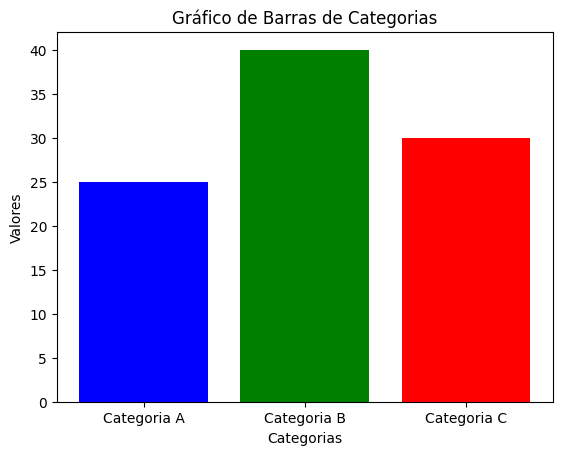

In [1]:
import matplotlib.pyplot as plt

# Dados fictícios
categorias = ['Categoria A', 'Categoria B', 'Categoria C']
valores = [25, 40, 30]

# Criando o gráfico de barras
plt.bar(categorias, valores, color=['blue', 'green', 'red'])
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.title('Gráfico de Barras de Categorias')
plt.show()


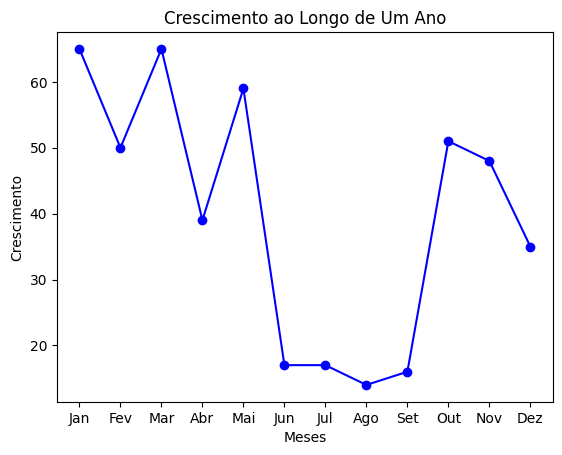

In [3]:
import numpy as np

# Dados fictícios para o crescimento ao longo de um ano
meses = np.arange(1, 13)
crescimento = np.random.randint(10, 100, size=12)

# Criando o gráfico de linha
plt.plot(meses, crescimento, marker='o', color='blue', linestyle='-')
plt.xlabel('Meses')
plt.ylabel('Crescimento')
plt.title('Crescimento ao Longo de Um Ano')
plt.xticks(np.arange(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(False)
plt.show()


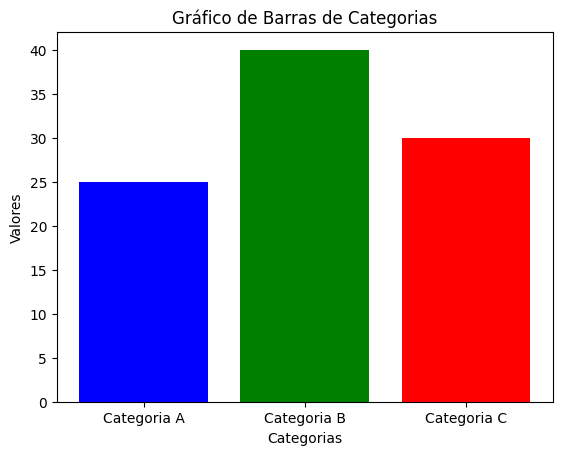

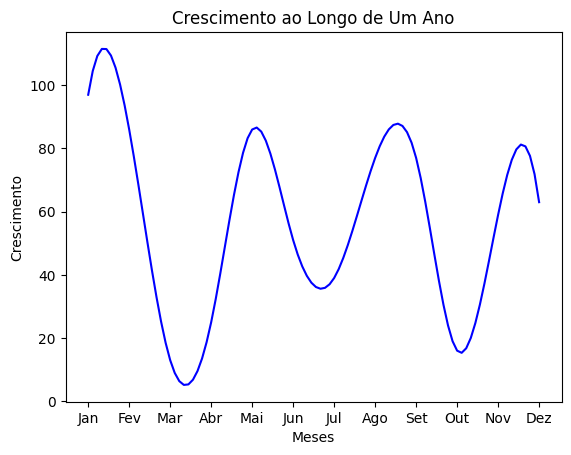

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Dados fictícios para o gráfico de barras
categorias = ['Categoria A', 'Categoria B', 'Categoria C']
valores = [25, 40, 30]

# Criando o gráfico de barras sem as linhas de fundo
plt.bar(categorias, valores, color=['blue', 'green', 'red'])
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.title('Gráfico de Barras de Categorias')
plt.grid(False)  # Removendo as linhas de fundo
plt.show()




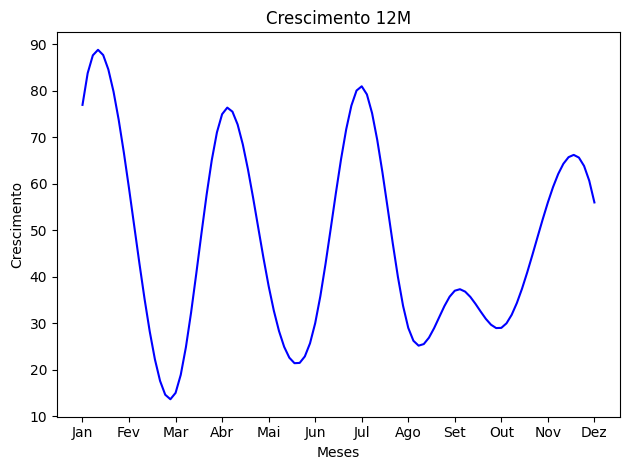

In [18]:
# Dados fictícios para o gráfico de linha
meses = np.arange(1, 13)
crescimento = np.random.randint(10, 100, size=12)

# Interpolação cúbica dos dados para suavizar as linhas
f = interp1d(meses, crescimento, kind='cubic')
meses_interp = np.linspace(meses.min(), meses.max(), 100)
crescimento_interp = f(meses_interp)

# Criando o gráfico de linha com linhas suaves
plt.plot(meses_interp, crescimento_interp, color='blue')
plt.xlabel('Meses')
plt.ylabel('Crescimento')
plt.title('Crescimento 12M')
plt.xticks(np.arange(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(False)  # Removendo as linhas de fundo
plt.tight_layout()
plt.savefig('grafico_2.jpg', format='jpg', dpi=300)
plt.show()

In [19]:
import pandas as pd

# Dados fictícios para as colunas CNPJ, NOME FANTASIA e TELEFONE
dados = {
    'CNPJ': ['12345678901234', '23456789012345', '34567890123456', '45678901234567', '56789012345678',
             '67890123456789', '78901234567890', '89012345678901', '90123456789012', '01234567890123'],
    'NOME FANTASIA': ['Empresa A', 'Empresa B', 'Empresa C', 'Empresa D', 'Empresa E',
                      'Empresa F', 'Empresa G', 'Empresa H', 'Empresa I', 'Empresa J'],
    'TELEFONE': ['(11) 1111-1111', '(22) 2222-2222', '(33) 3333-3333', '(44) 4444-4444', '(55) 5555-5555',
                 '(66) 6666-6666', '(77) 7777-7777', '(88) 8888-8888', '(99) 9999-9999', '(00) 0000-0000']
}

# Criando um DataFrame com os dados
df = pd.DataFrame(dados)

# Estilizando o cabeçalho da tabela com a cor #6a5acd (azul violeta)
styled_df = df.style.set_table_styles([{
    'selector': 'thead',
    'props': [('background-color', '#6a5acd'), ('color', 'white')]
}])

# Exibindo a tabela estilizada
styled_df


,CNPJ,NOME FANTASIA,TELEFONE
0,12345678901234,Empresa A,(11) 1111-1111
1,23456789012345,Empresa B,(22) 2222-2222
2,34567890123456,Empresa C,(33) 3333-3333
3,45678901234567,Empresa D,(44) 4444-4444
4,56789012345678,Empresa E,(55) 5555-5555
5,67890123456789,Empresa F,(66) 6666-6666
6,78901234567890,Empresa G,(77) 7777-7777
7,89012345678901,Empresa H,(88) 8888-8888
8,90123456789012,Empresa I,(99) 9999-9999
9,01234567890123,Empresa J,(00) 0000-0000


In [20]:
import pandas as pd
from faker import Faker

# Inicializando o Faker para gerar dados fictícios
fake = Faker('pt_BR')  # Configurado para português do Brasil

# Gerando dados fictícios para as colunas CNPJ, NOME FANTASIA e TELEFONE
dados = {
    'CNPJ': [fake.cnpj() for _ in range(10)],
    'NOME FANTASIA': [fake.company() for _ in range(10)],
    'TELEFONE': [fake.phone_number() for _ in range(10)]
}

# Criando um DataFrame com os dados
df = pd.DataFrame(dados)

# Estilizando o cabeçalho da tabela com a cor #6a5acd (azul violeta)
styled_df = df.style.set_table_styles([{
    'selector': 'thead',
    'props': [('background-color', '#6a5acd'), ('color', 'white')]
}])

# Exibindo a tabela estilizada
styled_df


,CNPJ,NOME FANTASIA,TELEFONE
0,59.817.640/0001-31,Novaes,0300 778 1405
1,80.342.961/0001-13,Martins,(071) 1729-2407
2,14.873.096/0001-07,Melo - EI,51 7423 0311
3,64.519.708/0001-36,Rocha Ramos Ltda.,+55 (041) 3010-1064
4,39.587.140/0001-43,Nogueira Almeida Ltda.,(041) 9315-7423
5,92.761.830/0001-50,Moraes,+55 (081) 2226-4717
6,45.690.823/0001-24,Nogueira Ltda.,(071) 4028-4431
7,94.105.327/0001-71,Silva Cavalcanti e Filhos,31 4214-8465
8,45.861.972/0001-09,Gonçalves S.A.,61 4543-0544
9,80.497.531/0001-70,da Costa,+55 (071) 8869 3871


In [23]:
import pandas as pd
from faker import Faker
import imgkit

# Inicializando o Faker para gerar dados fictícios
fake = Faker('pt_BR')  # Configurado para português do Brasil

# Gerando dados fictícios para as colunas CNPJ, NOME FANTASIA e TELEFONE
dados = {
    'CNPJ': [fake.cnpj() for _ in range(10)],
    'NOME FANTASIA': [fake.company() for _ in range(10)],
    'TELEFONE': [fake.phone_number() for _ in range(10)]
}

# Criando um DataFrame com os dados
df = pd.DataFrame(dados)

# Estilizando o cabeçalho da tabela com a cor #6a5acd (azul violeta)
styled_df = df.style.set_table_styles([{
    'selector': 'thead',
    'props': [('background-color', '#6a5acd'), ('color', 'white')]
}])

# Salvar a tabela estilizada como um arquivo HTML
styled_df.to_html('tabela_estilizada.html')

# Converter o HTML em uma imagem JPEG usando imgkit
imgkit.from_file('tabela_estilizada.html', 'tabela_estilizada.jpg')


OSError: 
No wkhtmltoimage executable found: "command not found"
If this file exists please check that this process can read it.
Otherwise please install wkhtmltopdf - http://wkhtmltopdf.org

        

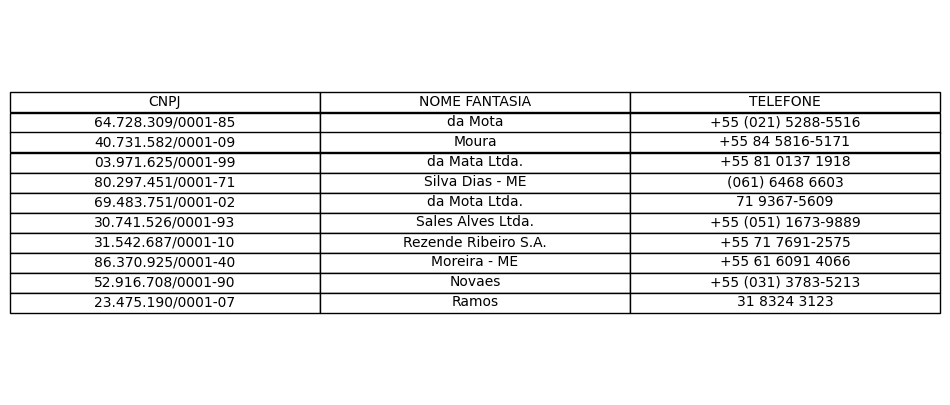

In [24]:
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

# Inicializando o Faker para gerar dados fictícios
fake = Faker('pt_BR')  # Configurado para português do Brasil

# Gerando dados fictícios para as colunas CNPJ, NOME FANTASIA e TELEFONE
dados = {
    'CNPJ': [fake.cnpj() for _ in range(10)],
    'NOME FANTASIA': [fake.company() for _ in range(10)],
    'TELEFONE': [fake.phone_number() for _ in range(10)]
}

# Criando um DataFrame com os dados
df = pd.DataFrame(dados)

# Criando a tabela como uma figura do matplotlib
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, frame_on=False)  # Oculta a moldura do gráfico

# Esconde os eixos
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Cria a tabela
tab = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Estilizando a tabela
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)  # Aumenta o tamanho da tabela

# Salva a figura como JPEG
plt.savefig('tabela_estilizada.jpg', bbox_inches='tight', pad_inches=0.5)


ValueError: 'cellColours' must have 10 rows

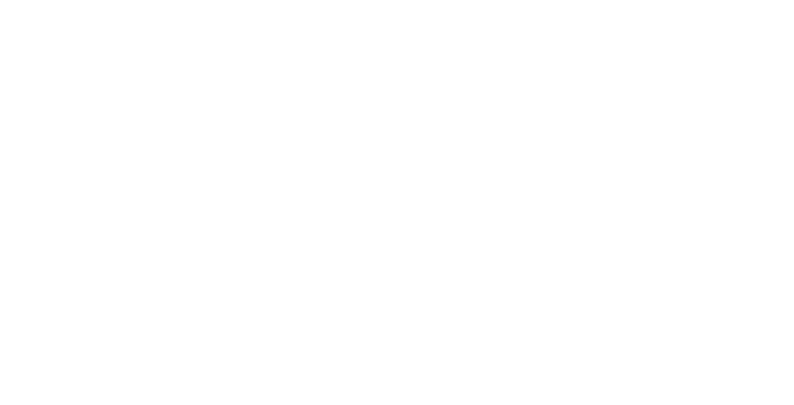

In [25]:
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

# Inicializando o Faker para gerar dados fictícios
fake = Faker('pt_BR')  # Configurado para português do Brasil

# Gerando dados fictícios para as colunas CNPJ, NOME FANTASIA e TELEFONE
dados = {
    'CNPJ': [fake.cnpj() for _ in range(10)],
    'NOME FANTASIA': [fake.company() for _ in range(10)],
    'TELEFONE': [fake.phone_number() for _ in range(10)]
}

# Criando um DataFrame com os dados
df = pd.DataFrame(dados)

# Criando a tabela como uma figura do matplotlib
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, frame_on=False)  # Oculta a moldura do gráfico

# Esconde os eixos
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Cria a tabela
tab = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', 
               cellColours=[['#6a5acd'] * len(df.columns)] + [['w'] * len(df.columns)] * len(df))

# Estilizando a tabela
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)  # Aumenta o tamanho da tabela

# Salva a figura como JPEG
plt.savefig('tabela_estilizada.jpg', bbox_inches='tight', pad_inches=0.5)


ValueError: 'cellColours' must have 10 rows

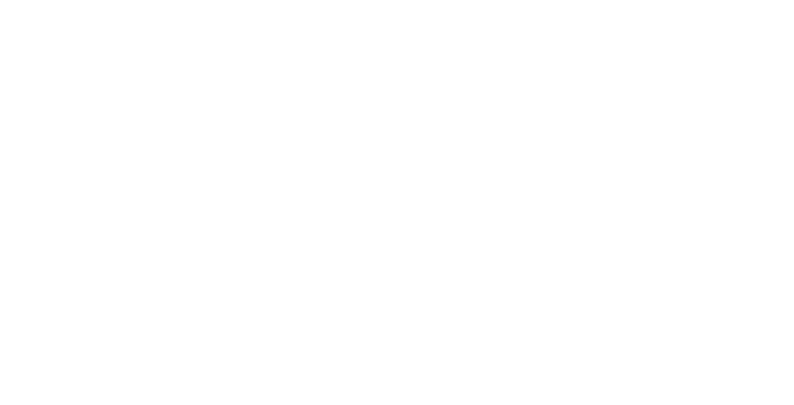

In [26]:
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

# Inicializando o Faker para gerar dados fictícios
fake = Faker('pt_BR')  # Configurado para português do Brasil

# Gerando dados fictícios para as colunas CNPJ, NOME FANTASIA e TELEFONE
dados = {
    'CNPJ': [fake.cnpj() for _ in range(10)],
    'NOME FANTASIA': [fake.company() for _ in range(10)],
    'TELEFONE': [fake.phone_number() for _ in range(10)]
}

# Criando um DataFrame com os dados
df = pd.DataFrame(dados)

# Criando a tabela como uma figura do matplotlib
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, frame_on=False)  # Oculta a moldura do gráfico

# Esconde os eixos
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Lista de cores para cada linha da tabela
cores = [['#6a5acd'] * len(df.columns)]  # Cor do cabeçalho das colunas
for _ in range(len(df)):
    cores.append(['w'] * len(df.columns))  # Cor do conteúdo das células

# Cria a tabela
tab = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', 
               cellColours=cores)

# Estilizando a tabela
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)  # Aumenta o tamanho da tabela

# Salva a figura como JPEG
plt.savefig('tabela_estilizada.jpg', bbox_inches='tight', pad_inches=0.5)


In [22]:
!pip install imgkit


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


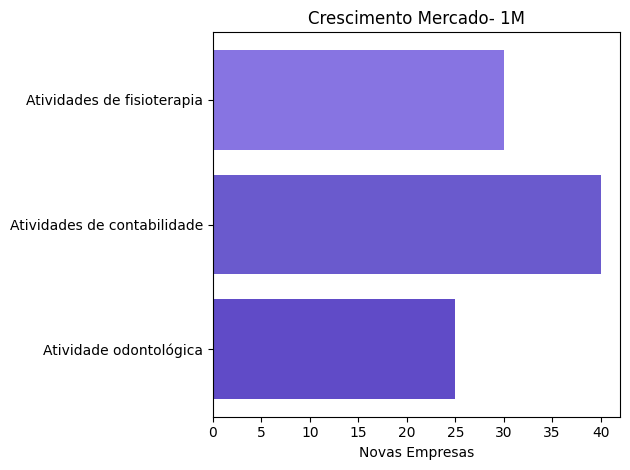

In [16]:
import matplotlib.pyplot as plt

# Dados fictícios para o gráfico de barras
categorias = ['Atividade odontológica', 'Atividades de contabilidade', 'Atividades de fisioterapia']
valores = [25, 40, 30]

# Criando o gráfico de barras horizontais
plt.barh(categorias, valores, color=['#604bc7', '#6a5acd', '#8774e2'])
plt.xlabel('Novas Empresas')
plt.title('Crescimento Mercado- 1M')
plt.grid(False)  # Removendo as linhas de fundo
plt.tight_layout()
plt.savefig('grafico_1.jpg', format='jpg', dpi=300)
plt.show()


ValueError: RGBA values should be within 0-1 range

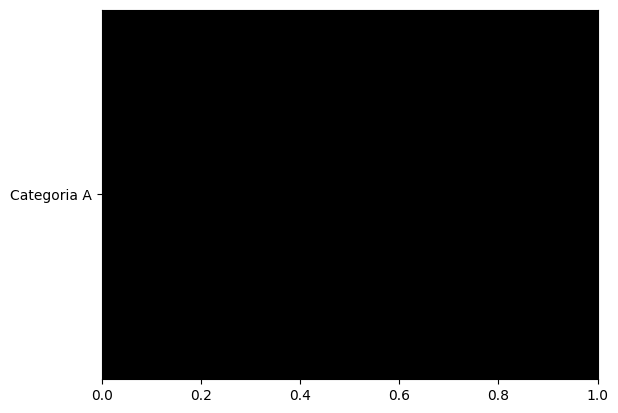

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Função para gerar cores baseadas no tom de azul marinho
def generate_navy_colors(num_colors):
    navy_colors = []
    base_color = (0, 0, 128)  # Azul marinho em RGB
    for i in range(num_colors):
        shade = int(128 - (i / num_colors) * 128)
        color = tuple(max(0, comp - shade) for comp in base_color)
        navy_colors.append(color)
    return navy_colors

# Dados fictícios para o gráfico de barras
categorias = ['Categoria A', 'Categoria B', 'Categoria C']
valores = [25, 40, 30]

# Gerando cores baseadas no tom de azul marinho
num_barras = len(categorias)
cores = generate_navy_colors(num_barras)

# Criando o gráfico de barras horizontais com cores baseadas em azul marinho
plt.barh(categorias, valores, color=cores)
plt.xlabel('Valores')
plt.ylabel('Categorias')
plt.title('Gráfico de Barras Horizontais de Categorias')
plt.grid(False)  # Removendo as linhas de fundo
plt.show()
